In [7]:
import pandas as pd
df = pd.read_csv('city_weather_data.csv')
df.head(10)


,City,Temperature (°C),Feels Like (°C),Humidity (%),Pressure (hPa),Weather,Wind Speed (m/s)
0,New York,23.35,23.54,69,1002,Few clouds,7.20
1,San Francisco,23.30,23.30,62,1015,Few clouds,3.60
2,London,21.78,21.76,67,1018,Broken clouds,4.12
3,Tokyo,15.90,15.50,75,1005,Heavy intensity rain,9.77
4,Delhi,30.05,31.28,51,996,Haze,1.03
5,Cairo,26.42,26.42,50,1009,Clear sky,5.66
6,Sao Paulo,17.63,17.35,73,1021,Few clouds,5.14
7,Sydney,12.98,12.53,84,1027,Overcast clouds,3.60
8,Toronto,24.59,24.31,46,1000,Overcast clouds,1.79
9,Paris,28.03,28.22,47,1018,Clear sky,3.09


In [9]:
print("Statistik Suhu:")
print(df['Temperature (°C)'].describe())
print("\nStatistik Kelembaban:")
print(df['Humidity (%)'].describe())

Statistik Suhu:
count    10.000000
mean     22.403000
std       5.446834
min      12.980000
25%      18.667500
50%      23.325000
75%      25.962500
max      30.050000
Name: Temperature (°C), dtype: float64

Statistik Kelembaban:
count    10.000000
mean     62.400000
std      13.301629
min      46.000000
25%      50.250000
50%      64.500000
75%      72.000000
max      84.000000
Name: Humidity (%), dtype: float64


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['Temperature (°C)']] # Variabel independen harus 2D
y = df['Humidity (%)']       # Variabel dependen

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1= model.coef_[0]

print(f"Persamaan Regresi: Kelembaban = {beta_0:.2f} + {beta_1:.2f} * Suhu")
#Setiap tambahan 1 suhu, kelembapan diperkirakan turun sebesar 2,22%. 

Persamaan Regresi: Kelembaban = 112.12 + -2.22 * Suhu


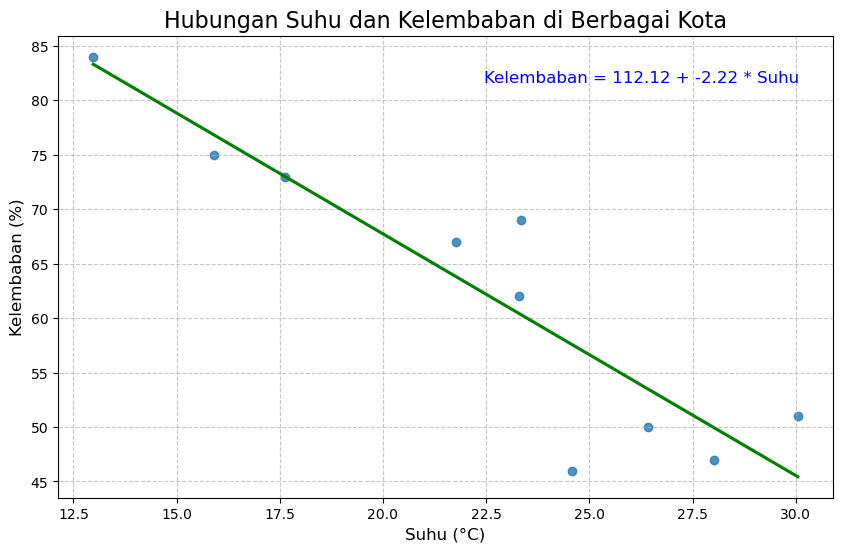

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature (°C)', y='Humidity (%)', data=df, ci=None, line_kws={"color": "green"})
plt.title('Hubungan Suhu dan Kelembaban di Berbagai Kota', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Kelembaban (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.annotate(f'Kelembaban = {beta_0:.2f} + {beta_1:.2f} * Suhu',
             xy=(0.55, 0.9), xycoords='axes fraction', fontsize=12, color='blue')
plt.show()